In [52]:
import numpy as np 
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm 
import random 

from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

In [53]:
env = gym.make('MountainCar-v0', render_mode = 'rgb_array').env

In [54]:
alpha = 0.1
gamma = 0.95 

obs = [20, 15]
window = np.array([0.1,0.01]) 

In [55]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [56]:
class Agent: 
    
    def __init__(self, env, alpha, gamma):
        
        self.alpha = alpha 
        self.gamma = gamma 
        self.env   = env 
        
        self.Q = np.random.uniform(low = 0, high= 1,size= obs + [env.action_space.n])
        pass
    
    def get_discrete_state(self,state):
        
        discrete_state = state/window + np.array([12,7])
        return tuple(discrete_state.astype(int))
    # Discrete STATES only 
    def action(self, state):
        return np.argmax(self.Q[state]) 

    def QUpdate(self, state, action, next_state, reward):
        index = state + (action,)
        # Q learning equation update
        self.Q[index] = self.Q[index] + \
                                self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[index])
    
    
    def train(self, epoch = 10000, epsilon = 0.1):
        
        rewards = []
        epoches = []
        for i in tqdm(range(epoch)):
            state = env.reset()[0]
            epochs, reward_total = 0, 0
            done = False
            
            while not done: 
                if random.uniform(0,1) <= epsilon:
                    action = env.action_space.sample()
                else: 
                    ds = self.get_discrete_state(state) 
                    action = self.action(ds) 
                
            
                ds = self.get_discrete_state(state) 
                next_state, reward, done, info, more_info = env.step(action)
                reward_total += reward
                ns = self.get_discrete_state(next_state)
                
                done = done or info 
                
               
                self.QUpdate(ds, action, ns, reward) 

                state = next_state
                epochs += 1
            
            epoches.append(epochs)
            rewards.append(reward_total)

        print("Average rewards: ", np.mean(rewards))
        return rewards, epoches
            
        
            
    def simulateRun(self):
        state = env.reset()[0]
        total_reward = 0
        
        frames = []
        done = False 
        while not done: 
            ds = self.get_discrete_state(state) 
            action = self.action(ds)
    
            next_state, reward, done, info , more_info = env.step(action)
            
            done = done or info 
            
            frames.append(env.render()) 
            if not done: 
                ns = self.get_discrete_state(next_state) 
                self.QUpdate(ds, action, ns, reward) 
            
            total_reward += reward
            state = next_state 
        
        print("Reward earned: ", total_reward)
        
        return frames 

In [57]:
agent = Agent(alpha = alpha, gamma = gamma, env = env)

In [58]:
rewards , epoches= agent.train()

100%|██████████| 10000/10000 [02:22<00:00, 70.36it/s]

Average rewards:  -220.019


In [81]:
frames = agent.simulateRun()

Reward earned:  -159.0


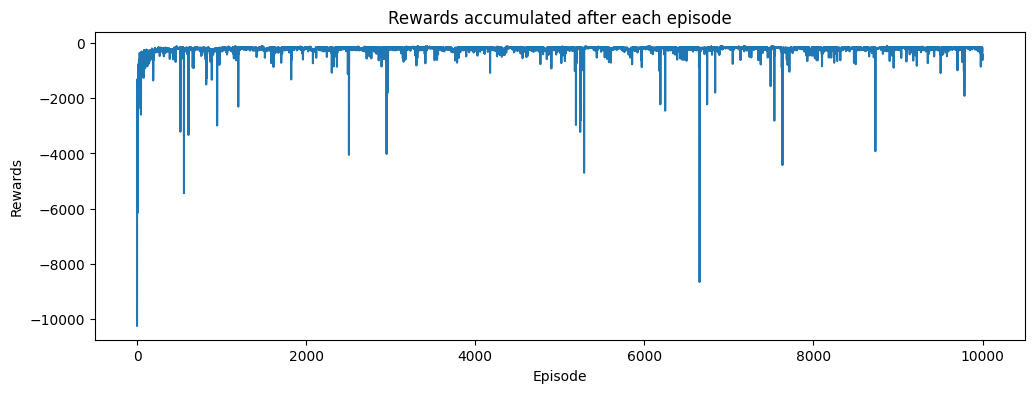

In [60]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards accumulated after each episode")
ax.set_ylabel('Rewards')
ax.set_xlabel('Episode')     
pd.Series(rewards).plot(kind='line')
plt.show()

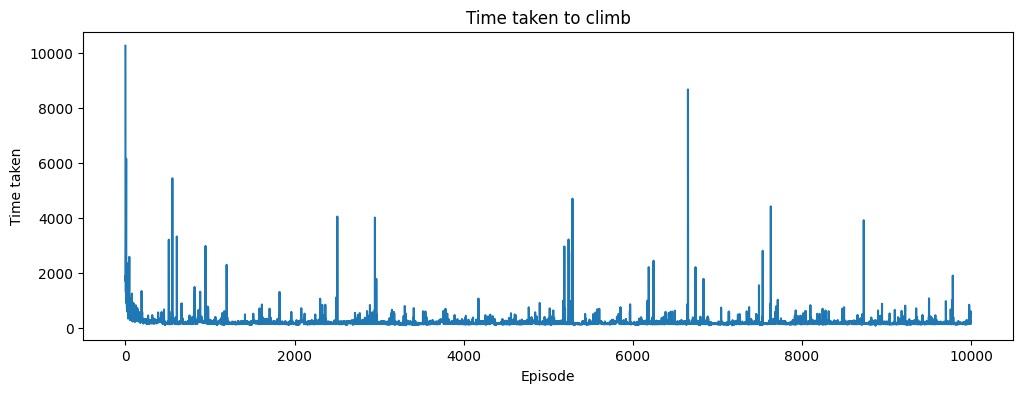

In [61]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Time taken to climb")
ax.set_ylabel('Time taken')
ax.set_xlabel('Episode')     
pd.Series(epoches).plot(kind='line')
plt.show()

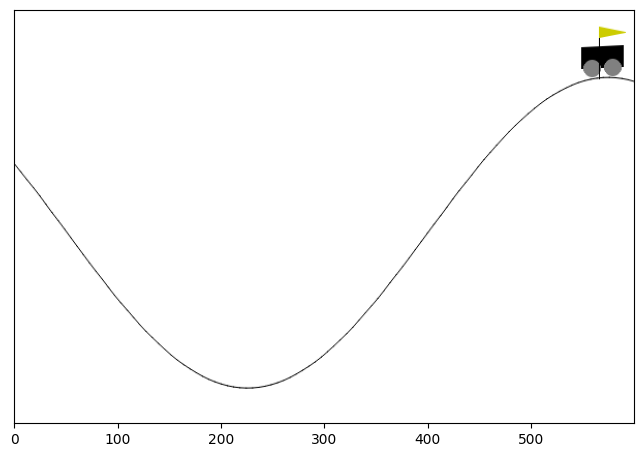

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(frames)):
    ax.cla()
    ax.axes.yaxis.set_visible(False)
    ax.imshow(frames[i])
    display(fig)
    clear_output(wait=True)
    sleep(0.01) 
